In [82]:
install.packages('FactoMineR')

Installing FactoMineR [2.8] ...
	OK [linked cache]


In [83]:
table <- read.table('new-data.csv',sep=',', header=TRUE, dec='.')
head(table)
#summary(table)

,Id,Depth,Depth2,Name,Long,Lat,Shore.distance
,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>
1,0,1029.0,1025.775,Globicephala macrorhynchus,-16.69158,27.96593,3636
2,1,905.0,1232.125,Globicephala macrorhynchus,-18.03670,27.63775,2882
3,2,1468.5,1459.475,Globicephala macrorhynchus,-16.83167,28.08167,6679
4,3,1795.0,1835.425,Globicephala macrorhynchus,-17.16700,27.95033,8748
5,4,1803.0,1821.075,Globicephala macrorhynchus,-17.21733,27.91733,11677
6,5,1260.0,1320.625,Globicephala macrorhynchus,-17.28017,27.96350,6914


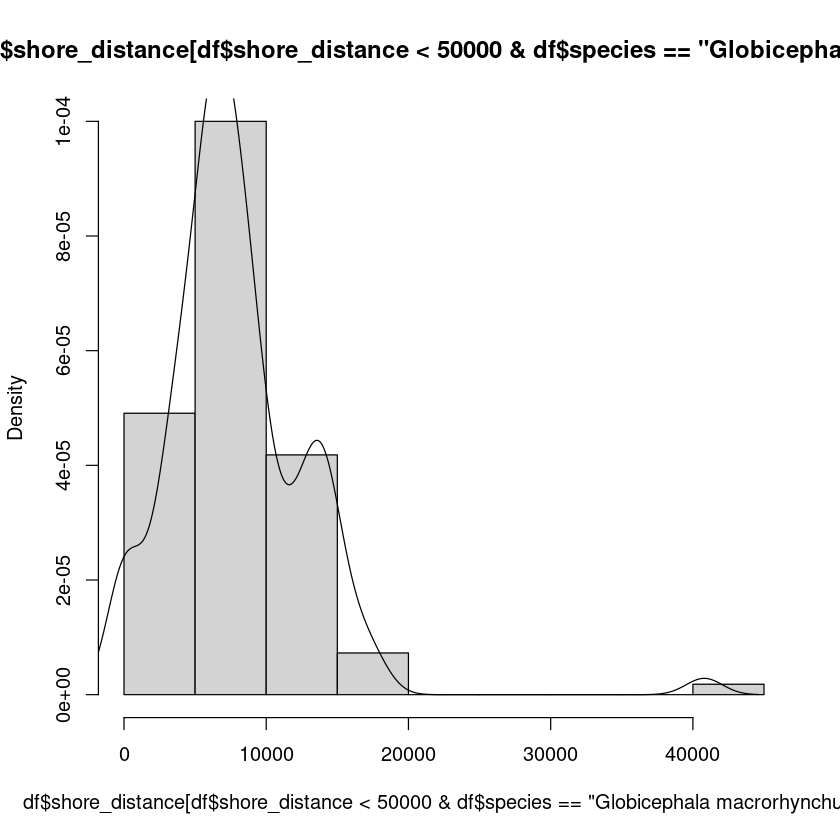

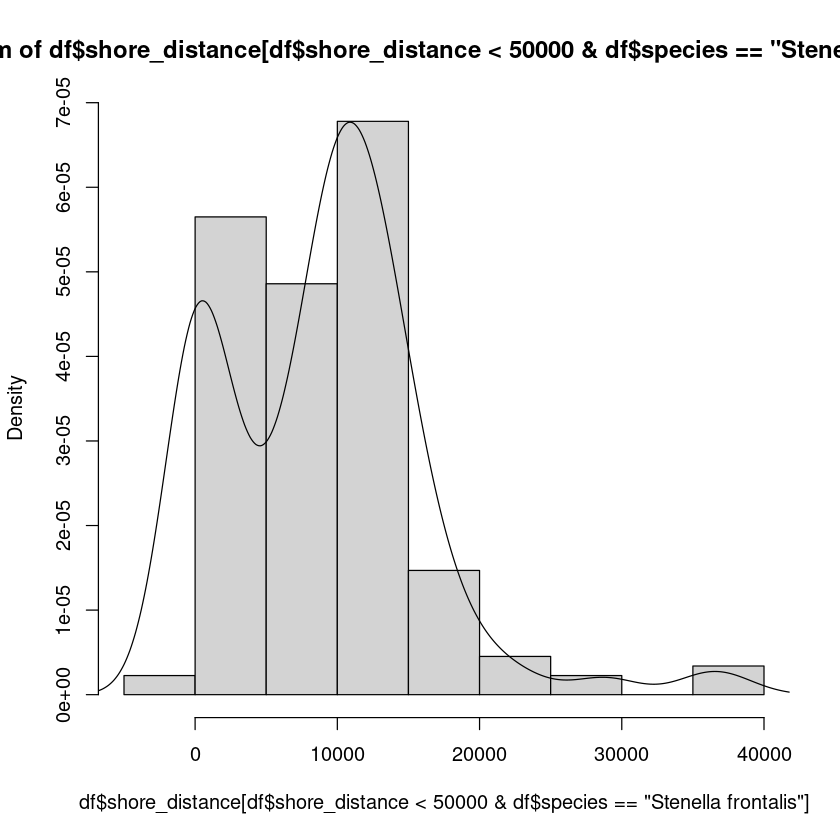

                            
                             <1000 1000-5000 5000-10000 10000-20000
  Globicephala macrorhynchus     8        19         55          27
  Stenella frontalis            38        12         43          73
  Tursiops truncatus            29        36         32          47

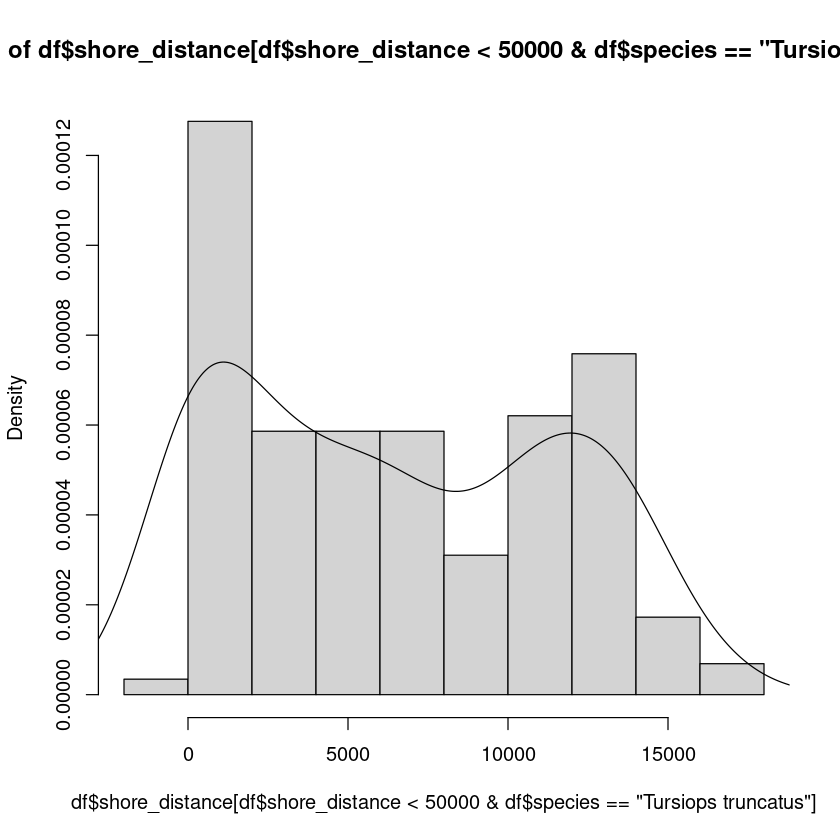

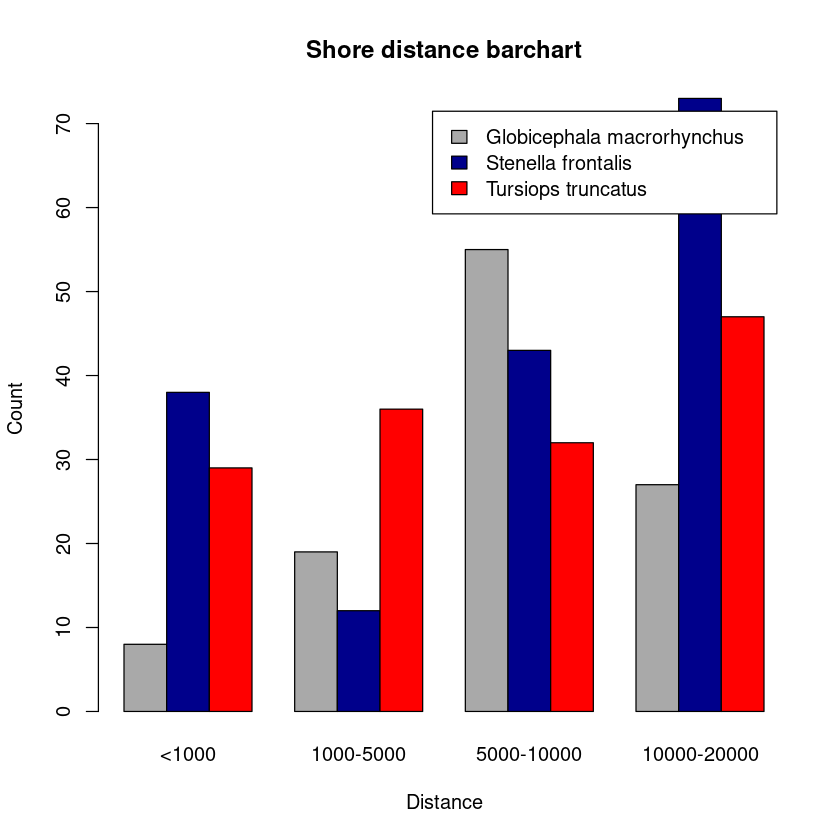

In [84]:
df <- data.frame(table$Name,table$Shore.distance)
colnames(df) = c('species','shore_distance')

hist(df$shore_distance[df$shore_distance<50000 & df$species=='Globicephala macrorhynchus'],nclass=10,freq=FALSE)
lines(density(df$shore_distance[df$shore_distance<50000 & df$species=='Globicephala macrorhynchus']))

hist(df$shore_distance[df$shore_distance<50000 & df$species=='Stenella frontalis'],nclass=10,freq=FALSE)
lines(density(df$shore_distance[df$shore_distance<50000 & df$species=='Stenella frontalis']))

hist(df$shore_distance[df$shore_distance<50000 & df$species=='Tursiops truncatus'],nclass=10,freq=FALSE)
lines(density(df$shore_distance[df$shore_distance<50000 & df$species=='Tursiops truncatus']))


#df$cat_shore = cut(df$shore_distance,breaks=c(0,1000,5000,10000,max(df$shore_distance)),include.lowest = TRUE,labels = c('<1000','1000-5000','5000-10000','>10000'))

df$cat_shore = cut(df$shore_distance,breaks=c(0,1000,5000,10000,20000),include.lowest = TRUE,labels = c('<1000','1000-5000','5000-10000','10000-20000'))

#decoupe = quantile(df$shore_distance,probs=seq(0,1,0.25))
#df$cat_shore = cut(df$shore_distance,breaks=decoupe,include.lowest = TRUE, ,labels = c('<3000','3000-8000','8000-12000','>12000'))

#df

tbl_cont <- table(df$species,df$cat_shore)
tbl_cont

barplot(tbl_cont,
        main = "Shore distance barchart",
        xlab = "Distance", ylab = "Count",
        col = c("darkgrey", "darkblue", "red"),
        legend.text = rownames(tbl_cont),
        beside = TRUE) # Grouped bars


## Chi2 test


In [85]:
print("Observed values")
tbl_cont

resultat = chisq.test(tbl_cont)
resultat

print("Expected values")
as.table(round(resultat$expected, 1))

print("Contributions")
round(100 * resultat$residuals^2 / resultat$statistic, 1)

print("Residuals")
round(resultat$residuals, 3)

[1] "Observed values"


                            
                             <1000 1000-5000 5000-10000 10000-20000
  Globicephala macrorhynchus     8        19         55          27
  Stenella frontalis            38        12         43          73
  Tursiops truncatus            29        36         32          47


	Pearson's Chi-squared test

data:  tbl_cont
X-squared = 50.485, df = 6, p-value = 3.759e-09


[1] "Expected values"


                            
                             <1000 1000-5000 5000-10000 10000-20000
  Globicephala macrorhynchus  19.5      17.4       33.8        38.2
  Stenella frontalis          29.7      26.5       51.5        58.2
  Tursiops truncatus          25.8      23.0       44.7        50.5

[1] "Contributions"


                            
                             <1000 1000-5000 5000-10000 10000-20000
  Globicephala macrorhynchus  13.5       0.3       26.3         6.5
  Stenella frontalis           4.6      15.8        2.8         7.4
  Tursiops truncatus           0.8      14.5        7.1         0.5

[1] "Residuals"


                            
                              <1000 1000-5000 5000-10000 10000-20000
  Globicephala macrorhynchus -2.606     0.376      3.642      -1.818
  Stenella frontalis          1.520    -2.823     -1.185       1.934
  Tursiops truncatus          0.635     2.704     -1.897      -0.495

## AFC


Call:
CA(X = tbl_cont) 

The chi square of independence between the two variables is equal to 50.48454 (p-value =  3.758592e-09 ).

Eigenvalues
                      Dim.1  Dim.2
Variance               0.08   0.04
% of var.             65.74  34.26
Cumulative % of var.  65.74 100.00

Rows
                             Iner*1000   Dim.1   ctr  cos2   Dim.2   ctr  cos2
Globicephala macrorhynchus |     56.09 | -0.45 67.38  0.95 | -0.10  6.61  0.05
Stenella frontalis         |     36.81 |  0.25 31.35  0.67 | -0.17 29.04  0.33
Tursiops truncatus         |     27.58 |  0.05  1.28  0.04 |  0.28 64.36  0.96
                            
Globicephala macrorhynchus |
Stenella frontalis         |
Tursiops truncatus         |

Columns
                             Iner*1000   Dim.1   ctr  cos2   Dim.2   ctr  cos2
<1000                      |     22.69 |  0.35 28.25  0.99 |  0.04  0.75  0.01
1000-5000                  |     36.80 | -0.19  7.56  0.16 |  0.44 74.65  0.84
5000-10000                 |   

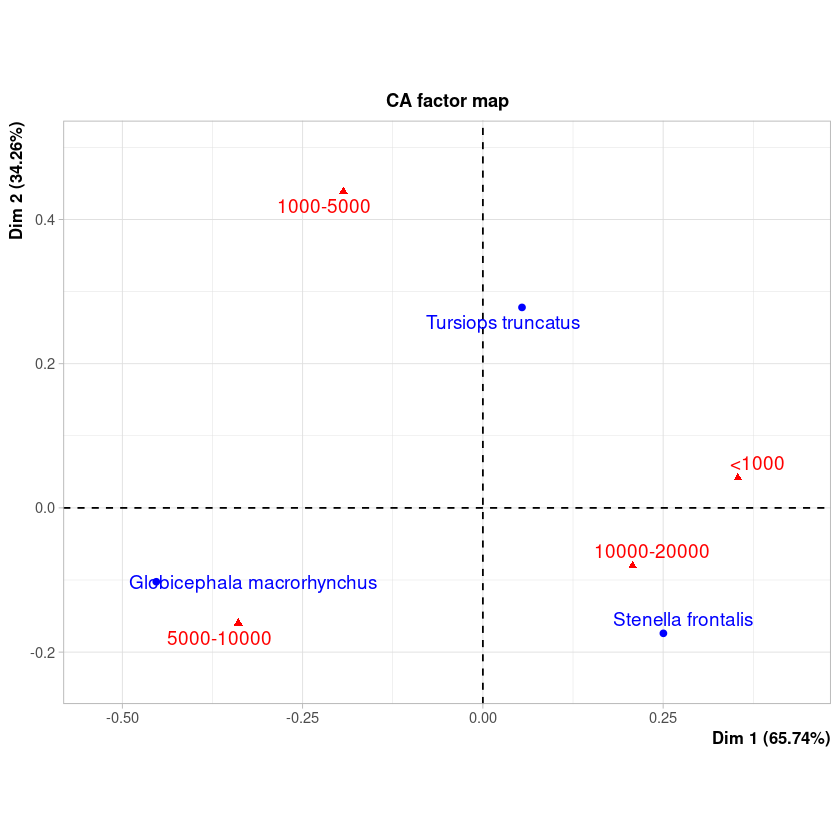

In [86]:
library(FactoMineR)
res.ca <- CA(tbl_cont)
summary(res.ca, nb.dec = 2, ncp = 2, nbelements = 4)